In [ ]:
from os import system; system('pip install vaderSentiment')

0

In [ ]:
system('pip install transformers datasets torch scikit-learn')

0

In [ ]:
system('pip install transformers datasets torch scikit-learn pandas')

0

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
logue1 = '/content/HateSpeech_Kenya.csv'

In [ ]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def janitor(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def hulk(texty):
    blob = TextBlob(texty)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
benchmark = '[<I do not understand what I yam doing and I love it!! 2 times in a row]'
print(janitor(benchmark))
print(hulk(benchmark))

understand yam love 2 times row
(0.78125, 0.6)


In [ ]:
dlogue = pd.read_csv(logue1)
dlogue.head(6)

,hate_speech,offensive_language,neither,Class,Tweet
0,0,0,3,0,['The political elite are in desperation. Ordi...
1,0,0,3,0,"[""Am just curious the only people who are call..."
2,0,0,3,0,['USERNAME_3 the area politicians are the one ...
3,0,0,3,0,['War expected in Nakuru if something is not d...
4,0,0,3,0,['USERNAME_4 tells kikuyus activists that they...
5,0,0,3,0,['USERNAME_6 USERNAME_7 Nowdays when you go to...


In [ ]:
line_up = list(dlogue['Tweet'])
Preprocessed_tweets = []

for me in line_up:
    me2 = janitor(me)
    Preprocessed_tweets.append(me2)

dlogue['Processed_tweets'] = Preprocessed_tweets
dlogue2 = dframe.drop('Tweet', axis=1)
dlogue2

,hate_speech,offensive_language,neither,Class,Processed_tweets
0,0,0,3,0,political elite desperation ordinary kalenjins...
1,0,0,3,0,curious people calling old mad kikuyus kalenji...
2,0,0,3,0,username_3 area politicians one blame coz r in...
3,0,0,3,0,war expected nakuru something done luos given ...
4,0,0,3,0,username_4 tells kikuyus activists targeted ta...
...,...,...,...,...,...
48071,0,0,2,0,exactly moses kuria ilk say negative ethnicity...
48072,0,0,2,0,exactly kenyans going thank god time rich poor...
48073,0,0,2,0,exactly wrong country kikuyus stand us live la...
48074,1,0,2,0,exactly thing well difference kilifi merely pu...


In [ ]:
dlogue2[['polarity', 'subjectivity']] = dlogue['Processed_tweets'].apply(hulk).apply(pd.Series)
dlogue2['hate_speech'] = dlogue2['polarity'].apply(lambda x: 1 if x < 0 else 0)
print(dlogue2.head(6))

   hate_speech  offensive_language  neither  Class  \
0            1                   0        3      0   
1            0                   0        3      0   
2            0                   0        3      0   
3            1                   0        3      0   
4            0                   0        3      0   
5            0                   0        3      0   

                                    Processed_tweets  polarity  subjectivity  
0  political elite desperation ordinary kalenjins...  -0.12500           0.3  
1  curious people calling old mad kikuyus kalenji...   0.01875           0.7  
2  username_3 area politicians one blame coz r in...   0.00000           0.0  
3  war expected nakuru something done luos given ...  -0.10000           0.4  
4  username_4 tells kikuyus activists targeted ta...   0.00000           0.0  
5  username_6 username_7 nowdays go seek justice ...   0.00000           0.0  


In [27]:
uniquespee = dlogue2['hate_speech'].unique()
uniqueneither = dlogue2['Class'].unique()

print("Unique classes in 'hate_speech':", uniquespee)
print("Unique classes in 'neither':", uniqueneither)

Unique classes in 'hate_speech': [1 0]
Unique classes in 'neither': [0 1 2]


Accuracy: 0.11
Classification Report:
                  precision    recall  f1-score   support

Non-Hate Speech       1.00      1.00      1.00     37294
    Hate Speech       1.00      1.00      1.00     10782

       accuracy                           1.00     48076
      macro avg       1.00      1.00      1.00     48076
   weighted avg       1.00      1.00      1.00     48076



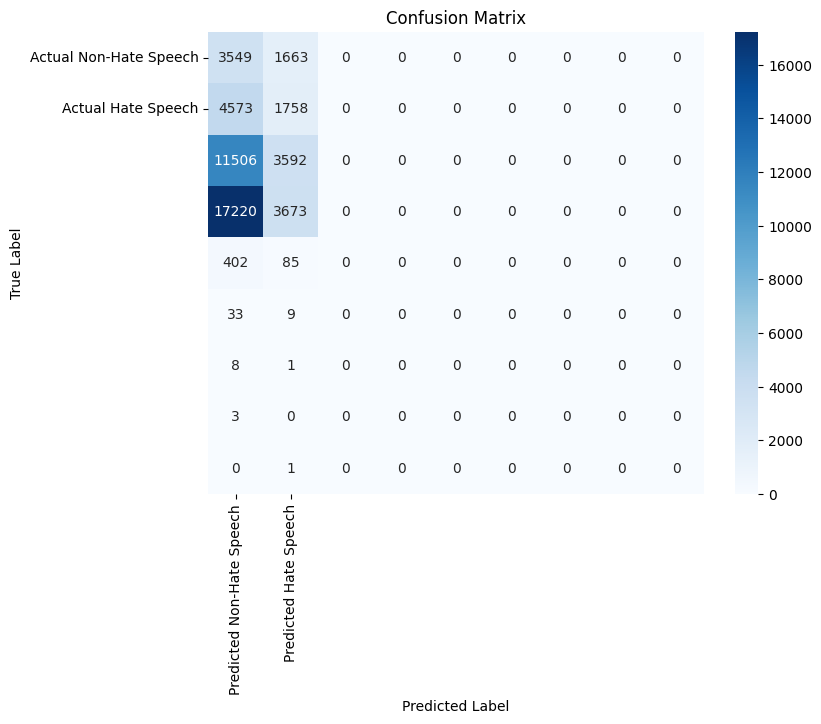

In [28]:
accuracy = accuracy_score(dlogue2['neither'], dlogue2['hate_speech'])
print(f"Accuracy: {accuracy:.2f}")
report = classification_report(dlogue2['hate_speech'],dlogue2['hate_speech'], target_names=['Non-Hate Speech', 'Hate Speech'])
print("Classification Report:\n", report)

confmatrix = confusion_matrix(dframe2['neither'], dframe2['hate_speech'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Hate Speech', 'Predicted Hate Speech'],
            yticklabels=['Actual Non-Hate Speech', 'Actual Hate Speech'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [29]:
def classify_text(text):
    processed_text = janitor(text)

    blob = TextBlob(processed_text)
    polarity = blob.sentiment.polarity

    if polarity < 0:
        return "Hate Speech"
    else:
        return "Non-Hate Speech"

text_to_classify = "She ate apples"
classification = classify_text(text_to_classify)
print(f"The text is classified as: {classification}")

The text is classified as: Non-Hate Speech
